In [42]:
import numpy as np
import imageio.v3 as imageio
from pathlib import Path
from IPython.display import Image, display

def show(img: np.ndarray):
    if issubclass(img.dtype.type, np.floating):
        img = np.clip(img, 0, 1)
        img = (img * 255).astype(np.uint8)
    elif issubclass(img.dtype.type, np.integer):
        pass
    else:
        raise ValueError(f"Unsupported image type: {img.dtype}")
    display(Image(imageio.imwrite('<bytes>', img, extension='.jpg')))

Ниже представлен код, рисующий карту части западного округа Москвы с некоторыми маршрутами общественного транспорта на ней. Цвет для каждого маршрута выбирается случайно из равномерного распределения на кубе sRGB.

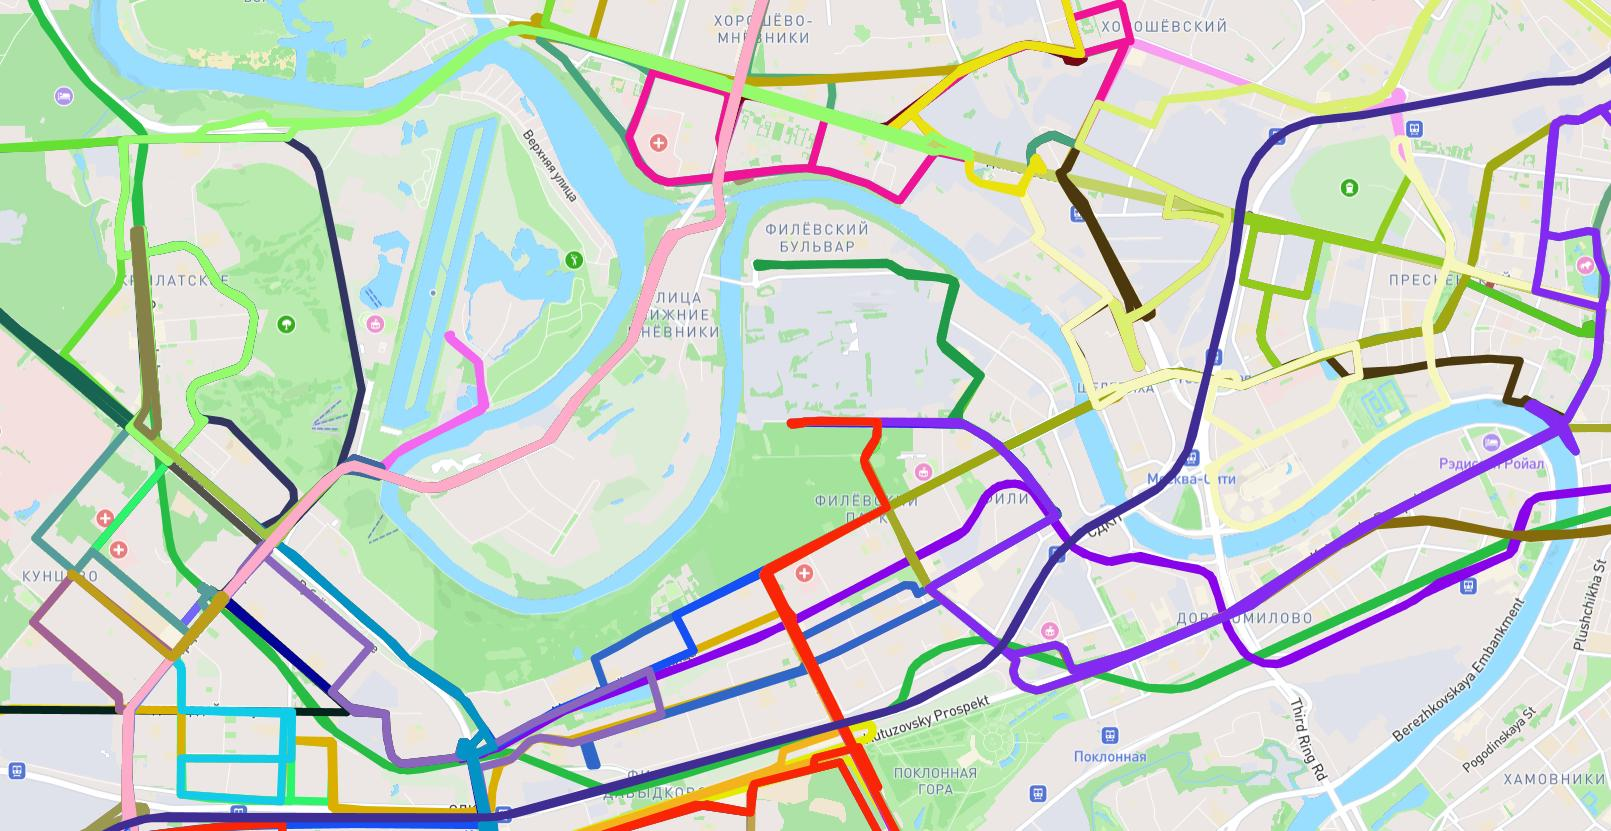

In [54]:
canvas = imageio.imread('data2/map.png')
canvas = canvas[..., :3]  # remove alpha channel
canvas = canvas / 255  # normalize to [0, 1]

np.random.seed(12)

routes_contours_paths = sorted(Path('data2/lines').glob('*.png'))
colors = np.random.rand(len(routes_contours_paths), 3)
for path, color in zip(routes_contours_paths, colors):
    contour = imageio.imread(path)
    contour = contour[..., 3:]  # leave only alpha channel
    contour = contour / 255  # normalize to [0, 1]
    canvas = canvas * (1 - contour) + color * contour
show(canvas)



Как видно, абсолютно случайный выбор цветов &mdash; не самое удачное решение. Некоторые цвета выглядят не очень контрастно на фоне карты и сливаются с ней.

Ваша задача &mdash; улучшить алгоритм выбора цветов.

Предлагаемые шаги:

1. Извлечь из карты основные используемые цвета, чтобы избегать их при выборе цветов для маршрутов.
2. Выбрать перцептивно однородное цветовое пространство.
3. Написать алгоритм, распределяющий $N$ точек в этом цветовом пространстве и по максимуму удаляющий их друг от друга и от "запретных" цветов из первого пункта.

Замечание к пункту 3: если семплировать каждую точку независимо от других, то велика вероятность сближения многих из них. Поэтому потребуется любая более хитрая схема на ваше усмотрение. Иными словами, мы хотим стремиться к левой картинке, а не к правой.
![](https://www.researchgate.net/publication/235709658/figure/fig4/AS:667856450617354@1536240794536/Starting-point-generators-in-2-D-Left-Uniform-random-distribution-pseudo-random-number.png)